In [11]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Cleveland Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=names)

# Preprocessing: Handling missing values
heart_data = heart_data.replace('?', pd.NA).dropna()

# Splitting the dataset into features (X) and target variable (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

# Evaluating model performance
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    return accuracy, precision, recall, f1

# Printing results
print("Decision Tree Classifier Results:")
print("Accuracy:", evaluate_model(dt_predictions, y_test)[0])
print("Precision:", evaluate_model(dt_predictions, y_test)[1])
print("Recall:", evaluate_model(dt_predictions, y_test)[2])
print("F1-score:", evaluate_model(dt_predictions, y_test)[3])
print()

print("Random Forest Classifier Results:")
print("Accuracy:", evaluate_model(rf_predictions, y_test)[0])
print("Precision:", evaluate_model(rf_predictions, y_test)[1])
print("Recall:", evaluate_model(rf_predictions, y_test)[2])
print("F1-score:", evaluate_model(rf_predictions, y_test)[3])
print()

print("Logistic Regression Results:")
print("Accuracy:", evaluate_model(lr_predictions, y_test)[0])
print("Precision:", evaluate_model(lr_predictions, y_test)[1])
print("Recall:", evaluate_model(lr_predictions, y_test)[2])
print("F1-score:", evaluate_model(lr_predictions, y_test)[3])
print()

print("Support Vector Machine (SVM) Results:")
print("Accuracy:", evaluate_model(svm_predictions, y_test)[0])
print("Precision:", evaluate_model(svm_predictions, y_test)[1])
print("Recall:", evaluate_model(svm_predictions, y_test)[2])
print("F1-score:", evaluate_model(svm_predictions, y_test)[3])


Decision Tree Classifier Results:
Accuracy: 0.48333333333333334
Precision: 0.5929166666666668
Recall: 0.48333333333333334
F1-score: 0.5260744810744812

Random Forest Classifier Results:
Accuracy: 0.6
Precision: 0.4911616161616161
Recall: 0.6
F1-score: 0.5401515151515152

Logistic Regression Results:
Accuracy: 0.6166666666666667
Precision: 0.5605297157622737
Recall: 0.6166666666666667
F1-score: 0.5782139379607736

Support Vector Machine (SVM) Results:
Accuracy: 0.65
Precision: 0.5514285714285715
Recall: 0.65
F1-score: 0.5918139730639731


/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/a

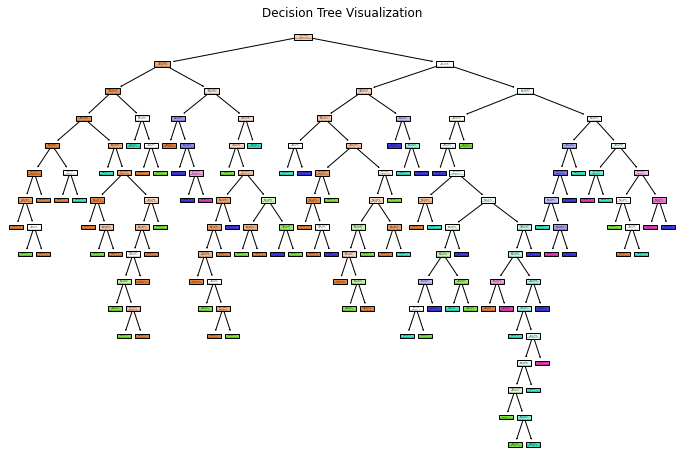

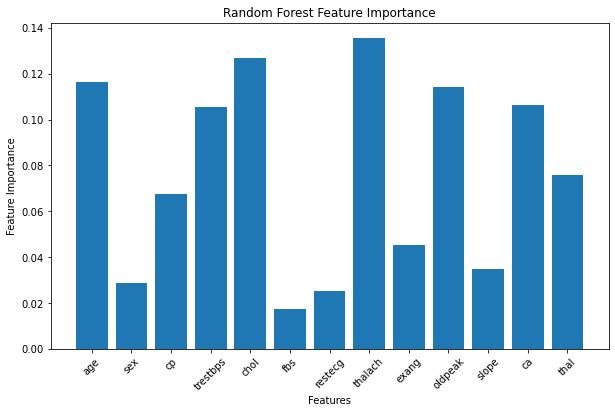

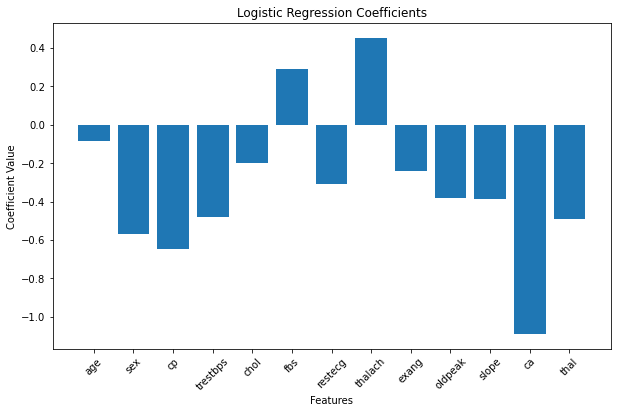

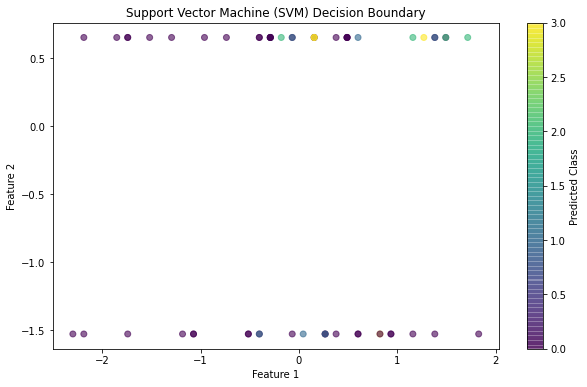

In [16]:
# Decision Trees - Feature Importance Analysis and Visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Random Forests - Feature Importance Analysis and Visualization
feature_importance_rf = rf_classifier.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance_rf)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45)
plt.show()

# Logistic Regression - Feature Importance Analysis and Visualization
coefficients_lr = lr_classifier.coef_[0]
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients_lr)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Logistic Regression Coefficients")
plt.xticks(rotation=45)
plt.show()

# Support Vector Machines (SVMs) - Visualization (Not Feature Importance)
# SVMs don't directly provide feature importance, so we visualize decision boundaries
# Scatter plot of two most important features
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=svm_predictions, cmap='viridis', alpha=0.6)
plt.title("Support Vector Machine (SVM) Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Predicted Class")
plt.show()


In [17]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to perform cross-validation and print results
def perform_cross_validation(model, X, y, cv=5):
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X, y, cv=cv, scoring='precision_weighted')
    recall_scores = cross_val_score(model, X, y, cv=cv, scoring='recall_weighted')
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
    
    print(f"Cross-Validation Results (Average over {cv} folds):")
    print("Accuracy:", np.mean(accuracy_scores))
    print("Precision:", np.mean(precision_scores))
    print("Recall:", np.mean(recall_scores))
    print("F1-score:", np.mean(f1_scores))
    print()

# Define a function to perform external validation and print results
def perform_external_validation(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    
    print("External Validation Results:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

# Split the dataset into features (X) and target variable (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform cross-validation for each model
print("Cross-Validation Results:")
print("--------------------------")
print("Decision Tree Classifier:")
perform_cross_validation(dt_classifier, X_train_scaled, y_train)

print("Random Forest Classifier:")
perform_cross_validation(rf_classifier, X_train_scaled, y_train)

print("Logistic Regression:")
perform_cross_validation(lr_classifier, X_train_scaled, y_train)

print("Support Vector Machine (SVM):")
perform_cross_validation(svm_classifier, X_train_scaled, y_train)

# Perform external validation for each model
print("External Validation Results:")
print("-----------------------------")
print("Decision Tree Classifier:")
perform_external_validation(dt_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

print("Random Forest Classifier:")
perform_external_validation(rf_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

print("Logistic Regression:")
perform_external_validation(lr_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

print("Support Vector Machine (SVM):")
perform_external_validation(svm_classifier, X_train_scaled, y_train, X_test_scaled, y_test)


Cross-Validation Results:
--------------------------
Decision Tree Classifier:
Cross-Validation Results (Average over 5 folds):
Accuracy: 0.4976950354609929
Precision: 0.5093231241982398
Recall: 0.4976950354609929
F1-score: 0.49803629431709034

Random Forest Classifier:


/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/a

Cross-Validation Results (Average over 5 folds):
Accuracy: 0.5568262411347519
Precision: 0.4751336119554204
Recall: 0.5568262411347519
F1-score: 0.4974648221437425

Logistic Regression:
Cross-Validation Results (Average over 5 folds):
Accuracy: 0.5654255319148936
Precision: 0.5315884928398684
Recall: 0.5654255319148936
F1-score: 0.5438963097824583

Support Vector Machine (SVM):


/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/a

Cross-Validation Results (Average over 5 folds):
Accuracy: 0.5652482269503546
Precision: 0.462227336141503
Recall: 0.5652482269503546
F1-score: 0.5000239426548929

External Validation Results:
-----------------------------
Decision Tree Classifier:
External Validation Results:
Accuracy: 0.48333333333333334
Precision: 0.5929166666666668
Recall: 0.48333333333333334
F1-score: 0.5260744810744812

Random Forest Classifier:
External Validation Results:
Accuracy: 0.6
Precision: 0.4911616161616161
Recall: 0.6
F1-score: 0.5401515151515152

Logistic Regression:
External Validation Results:
Accuracy: 0.6166666666666667
Precision: 0.5605297157622737
Recall: 0.6166666666666667
F1-score: 0.5782139379607736

Support Vector Machine (SVM):
External Validation Results:
Accuracy: 0.65
Precision: 0.5514285714285715
Recall: 0.65
F1-score: 0.5918139730639731



/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
from io import StringIO

# Load the dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), header=None, na_values='?')

# Handling missing values
data.dropna(inplace=True)

# Splitting the dataset into features (X) and target variable (y)
X = data.drop(columns=[13])  # Assuming the target column is the last one
y = data[13]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
for epoch in range(50):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model on test data
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    test_accuracy = ((test_outputs > 0.5).float() == y_test_tensor).float().mean()

print("Test Loss:", test_loss.item())
print("Test Accuracy:", test_accuracy.item())


Test Loss: -0.5702584981918335
Test Accuracy: 0.5666666626930237


Test Loss: -0.8976315259933472
Test Accuracy: 0.550000011920929


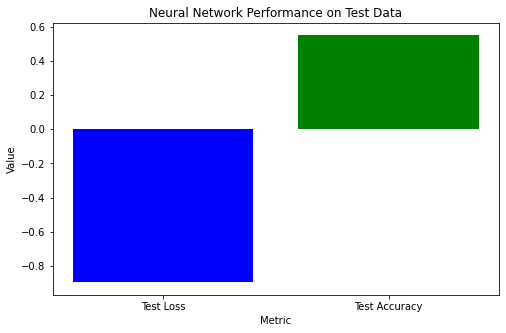

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

# Load the dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), header=None, na_values='?')

# Handling missing values
data.dropna(inplace=True)

# Splitting the dataset into features (X) and target variable (y)
X = data.drop(columns=[13])  # Assuming the target column is the last one
y = data[13]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
for epoch in range(50):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model on test data
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    test_accuracy = ((test_outputs > 0.5).float() == y_test_tensor).float().mean()

# Print test loss and accuracy
print("Test Loss:", test_loss.item())
print("Test Accuracy:", test_accuracy.item())

# Visualize the results
results = pd.DataFrame({'Metric': ['Test Loss', 'Test Accuracy'],
                        'Value': [test_loss.item(), test_accuracy.item()]})

plt.figure(figsize=(8, 5))
plt.bar(results['Metric'], results['Value'], color=['blue', 'green'])
plt.title('Neural Network Performance on Test Data')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import requests
from io import StringIO

# Load the dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), header=None, na_values='?')

# Handling missing values
data.dropna(inplace=True)

# Splitting the dataset into features (X) and target variable (y)
X = data.drop(columns=[13])  # Assuming the target column is the last one
y = data[13]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate traditional machine learning models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')  # Specify average parameter
    recall = recall_score(y_test, predictions, average='weighted')  # Specify average parameter
    f1 = f1_score(y_test, predictions, average='weighted')  # Specify average parameter
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Train and evaluate neural network model
# Define neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
for epoch in range(50):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model on test data
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor, test_predictions)
    precision = precision_score(y_test_tensor, test_predictions, average='weighted')  # Specify average parameter
    recall = recall_score(y_test_tensor, test_predictions, average='weighted')  # Specify average parameter
    f1 = f1_score(y_test_tensor, test_predictions, average='weighted')  # Specify average parameter

results['Neural Network'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Print results
print("Results:")
for model, metrics in results.items():
    print(f"Model: {model}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print()


Results:
Model: Decision Tree
Accuracy: 0.5333333333333333
Precision: 0.6299206349206351
Recall: 0.5333333333333333
F1-score: 0.5714015151515153

Model: Random Forest
Accuracy: 0.6166666666666667
Precision: 0.5604365079365079
Recall: 0.6166666666666667
F1-score: 0.5807182486129855

Model: Logistic Regression
Accuracy: 0.6166666666666667
Precision: 0.5605297157622737
Recall: 0.6166666666666667
F1-score: 0.5782139379607736

Model: Support Vector Machine
Accuracy: 0.65
Precision: 0.5514285714285715
Recall: 0.65
F1-score: 0.5918139730639731

Model: Neural Network
Accuracy: 0.5
Precision: 0.6063454759106933
Recall: 0.5
F1-score: 0.4996315401621223



/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mahfuzurrahaman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results:
Model: Decision Tree
Accuracy: 0.5
Precision: 0.5985994397759105
Recall: 0.5
F1-score: 0.5390491452991453

Model: Random Forest
Accuracy: 0.6333333333333333
Precision: 0.5195652173913043
Recall: 0.6333333333333333
F1-score: 0.5665599080233227

Model: Logistic Regression
Accuracy: 0.6166666666666667
Precision: 0.5605297157622737
Recall: 0.6166666666666667
F1-score: 0.5782139379607736

Model: Support Vector Machine
Accuracy: 0.65
Precision: 0.5514285714285715
Recall: 0.65
F1-score: 0.5918139730639731

Model: Neural Network
Accuracy: 0.5333333333333333
Precision: 0.6102857142857143
Recall: 0.5333333333333333
F1-score: 0.5266766020864382



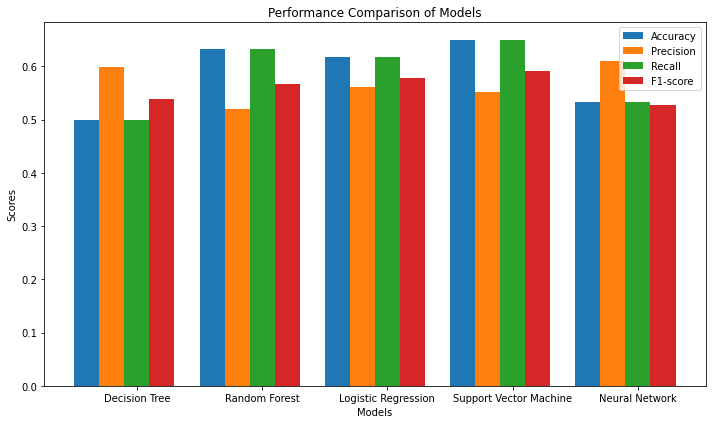

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Print results
print("Results:")
for model, metrics in results.items():
    print(f"Model: {model}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print()

# Visualize results
metrics_names = list(next(iter(results.values())).keys())
models_names = list(results.keys())
metrics_values = np.array([[results[model][metric] for metric in metrics_names] for model in models_names])

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models_names))

for i, metric_name in enumerate(metrics_names):
    ax.bar(index + i * bar_width, metrics_values[:, i], bar_width, label=metric_name)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(index + 0.5 * len(metrics_names) * bar_width)
ax.set_xticklabels(models_names)
ax.legend()

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random

# Load the Cleveland Heart Disease dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), header=None, na_values='?')

# Handling missing values
data.dropna(inplace=True)

# Splitting the dataset into features (X) and the target variable (y)
X = data.drop(columns=[13])  # Assuming the target column is the last one
y = data[13]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)

# Now, let's find a random person who has heart disease (class 1) and who doesn't have heart disease (class 0)
# Check if there are individuals from both classes in the test set
if (y_test == 1).any() and (y_test == 0).any():
    # Randomly select indices from the test set for each class
    random_index_with_disease = random.choice(y_test[y_test == 1].index)
    random_index_without_disease = random.choice(y_test[y_test == 0].index)

    # Ensure that randomly selected indices do not exceed the size of the test set
    random_index_with_disease = min(random_index_with_disease, len(X_test_scaled) - 1)
    random_index_without_disease = min(random_index_without_disease, len(X_test_scaled) - 1)

    # Predict the classes for the selected individuals
    person_with_disease = X_test_scaled[random_index_with_disease]
    person_without_disease = X_test_scaled[random_index_without_disease]

    prediction_with_disease = svm_model.predict([person_with_disease])
    prediction_without_disease = svm_model.predict([person_without_disease])

    print("\nRandom person with heart disease (Class 1):")
    print("Predicted class:", prediction_with_disease)
    print("Features:", X_test.iloc[random_index_with_disease])

    print("\nRandom person without heart disease (Class 0):")
    print("Predicted class:", prediction_without_disease)
    print("Features:", X_test.iloc[random_index_without_disease])
else:
    print("No individuals from both classes in the test set.")


Accuracy of SVM model: 0.65

Random person with heart disease (Class 1):
Predicted class: [0]
Features: 0      59.0
1       1.0
2       1.0
3     178.0
4     270.0
5       0.0
6       2.0
7     145.0
8       0.0
9       4.2
10      3.0
11      0.0
12      7.0
Name: 183, dtype: float64

Random person without heart disease (Class 0):
Predicted class: [0]
Features: 0      52.0
1       1.0
2       2.0
3     134.0
4     201.0
5       0.0
6       0.0
7     158.0
8       0.0
9       0.8
10      1.0
11      1.0
12      3.0
Name: 98, dtype: float64


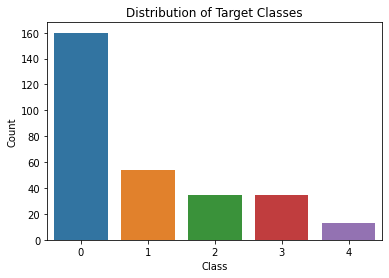

Accuracy of SVM model: 0.65

Random person with heart disease (Class 1):
Predicted class: [0]
Features: 0      59.0
1       1.0
2       1.0
3     178.0
4     270.0
5       0.0
6       2.0
7     145.0
8       0.0
9       4.2
10      3.0
11      0.0
12      7.0
Name: 183, dtype: float64

Random person without heart disease (Class 0):
Predicted class: [0]
Features: 0      39.0
1       1.0
2       3.0
3     140.0
4     321.0
5       0.0
6       2.0
7     182.0
8       0.0
9       0.0
10      1.0
11      0.0
12      3.0
Name: 82, dtype: float64


In [7]:
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Cleveland Heart Disease dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), header=None, na_values='?')

# Handling missing values
data.dropna(inplace=True)

# Explore data with visualizations
sns.countplot(x=data[13])
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Splitting the dataset into features (X) and the target variable (y)
X = data.drop(columns=[13])  # Assuming the target column is the last one
y = data[13]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)

# Now, let's find a random person who has heart disease (class 1) and who doesn't have heart disease (class 0)
# Check if there are individuals from both classes in the test set
if (y_test == 1).any() and (y_test == 0).any():
    # Randomly select indices from the test set for each class
    random_index_with_disease = random.choice(y_test[y_test == 1].index)
    random_index_without_disease = random.choice(y_test[y_test == 0].index)

    # Ensure that randomly selected indices do not exceed the size of the test set
    random_index_with_disease = min(random_index_with_disease, len(X_test_scaled) - 1)
    random_index_without_disease = min(random_index_without_disease, len(X_test_scaled) - 1)

    # Predict the classes for the selected individuals
    person_with_disease = X_test_scaled[random_index_with_disease]
    person_without_disease = X_test_scaled[random_index_without_disease]

    prediction_with_disease = svm_model.predict([person_with_disease])
    prediction_without_disease = svm_model.predict([person_without_disease])

    print("\nRandom person with heart disease (Class 1):")
    print("Predicted class:", prediction_with_disease)
    print("Features:", X_test.iloc[random_index_with_disease])

    print("\nRandom person without heart disease (Class 0):")
    print("Predicted class:", prediction_without_disease)
    print("Features:", X_test.iloc[random_index_without_disease])
else:
    print("No individuals from both classes in the test set.")


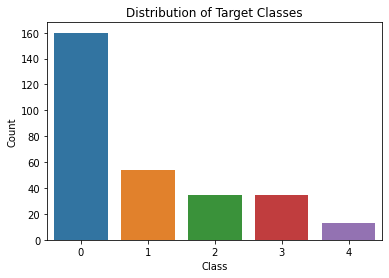

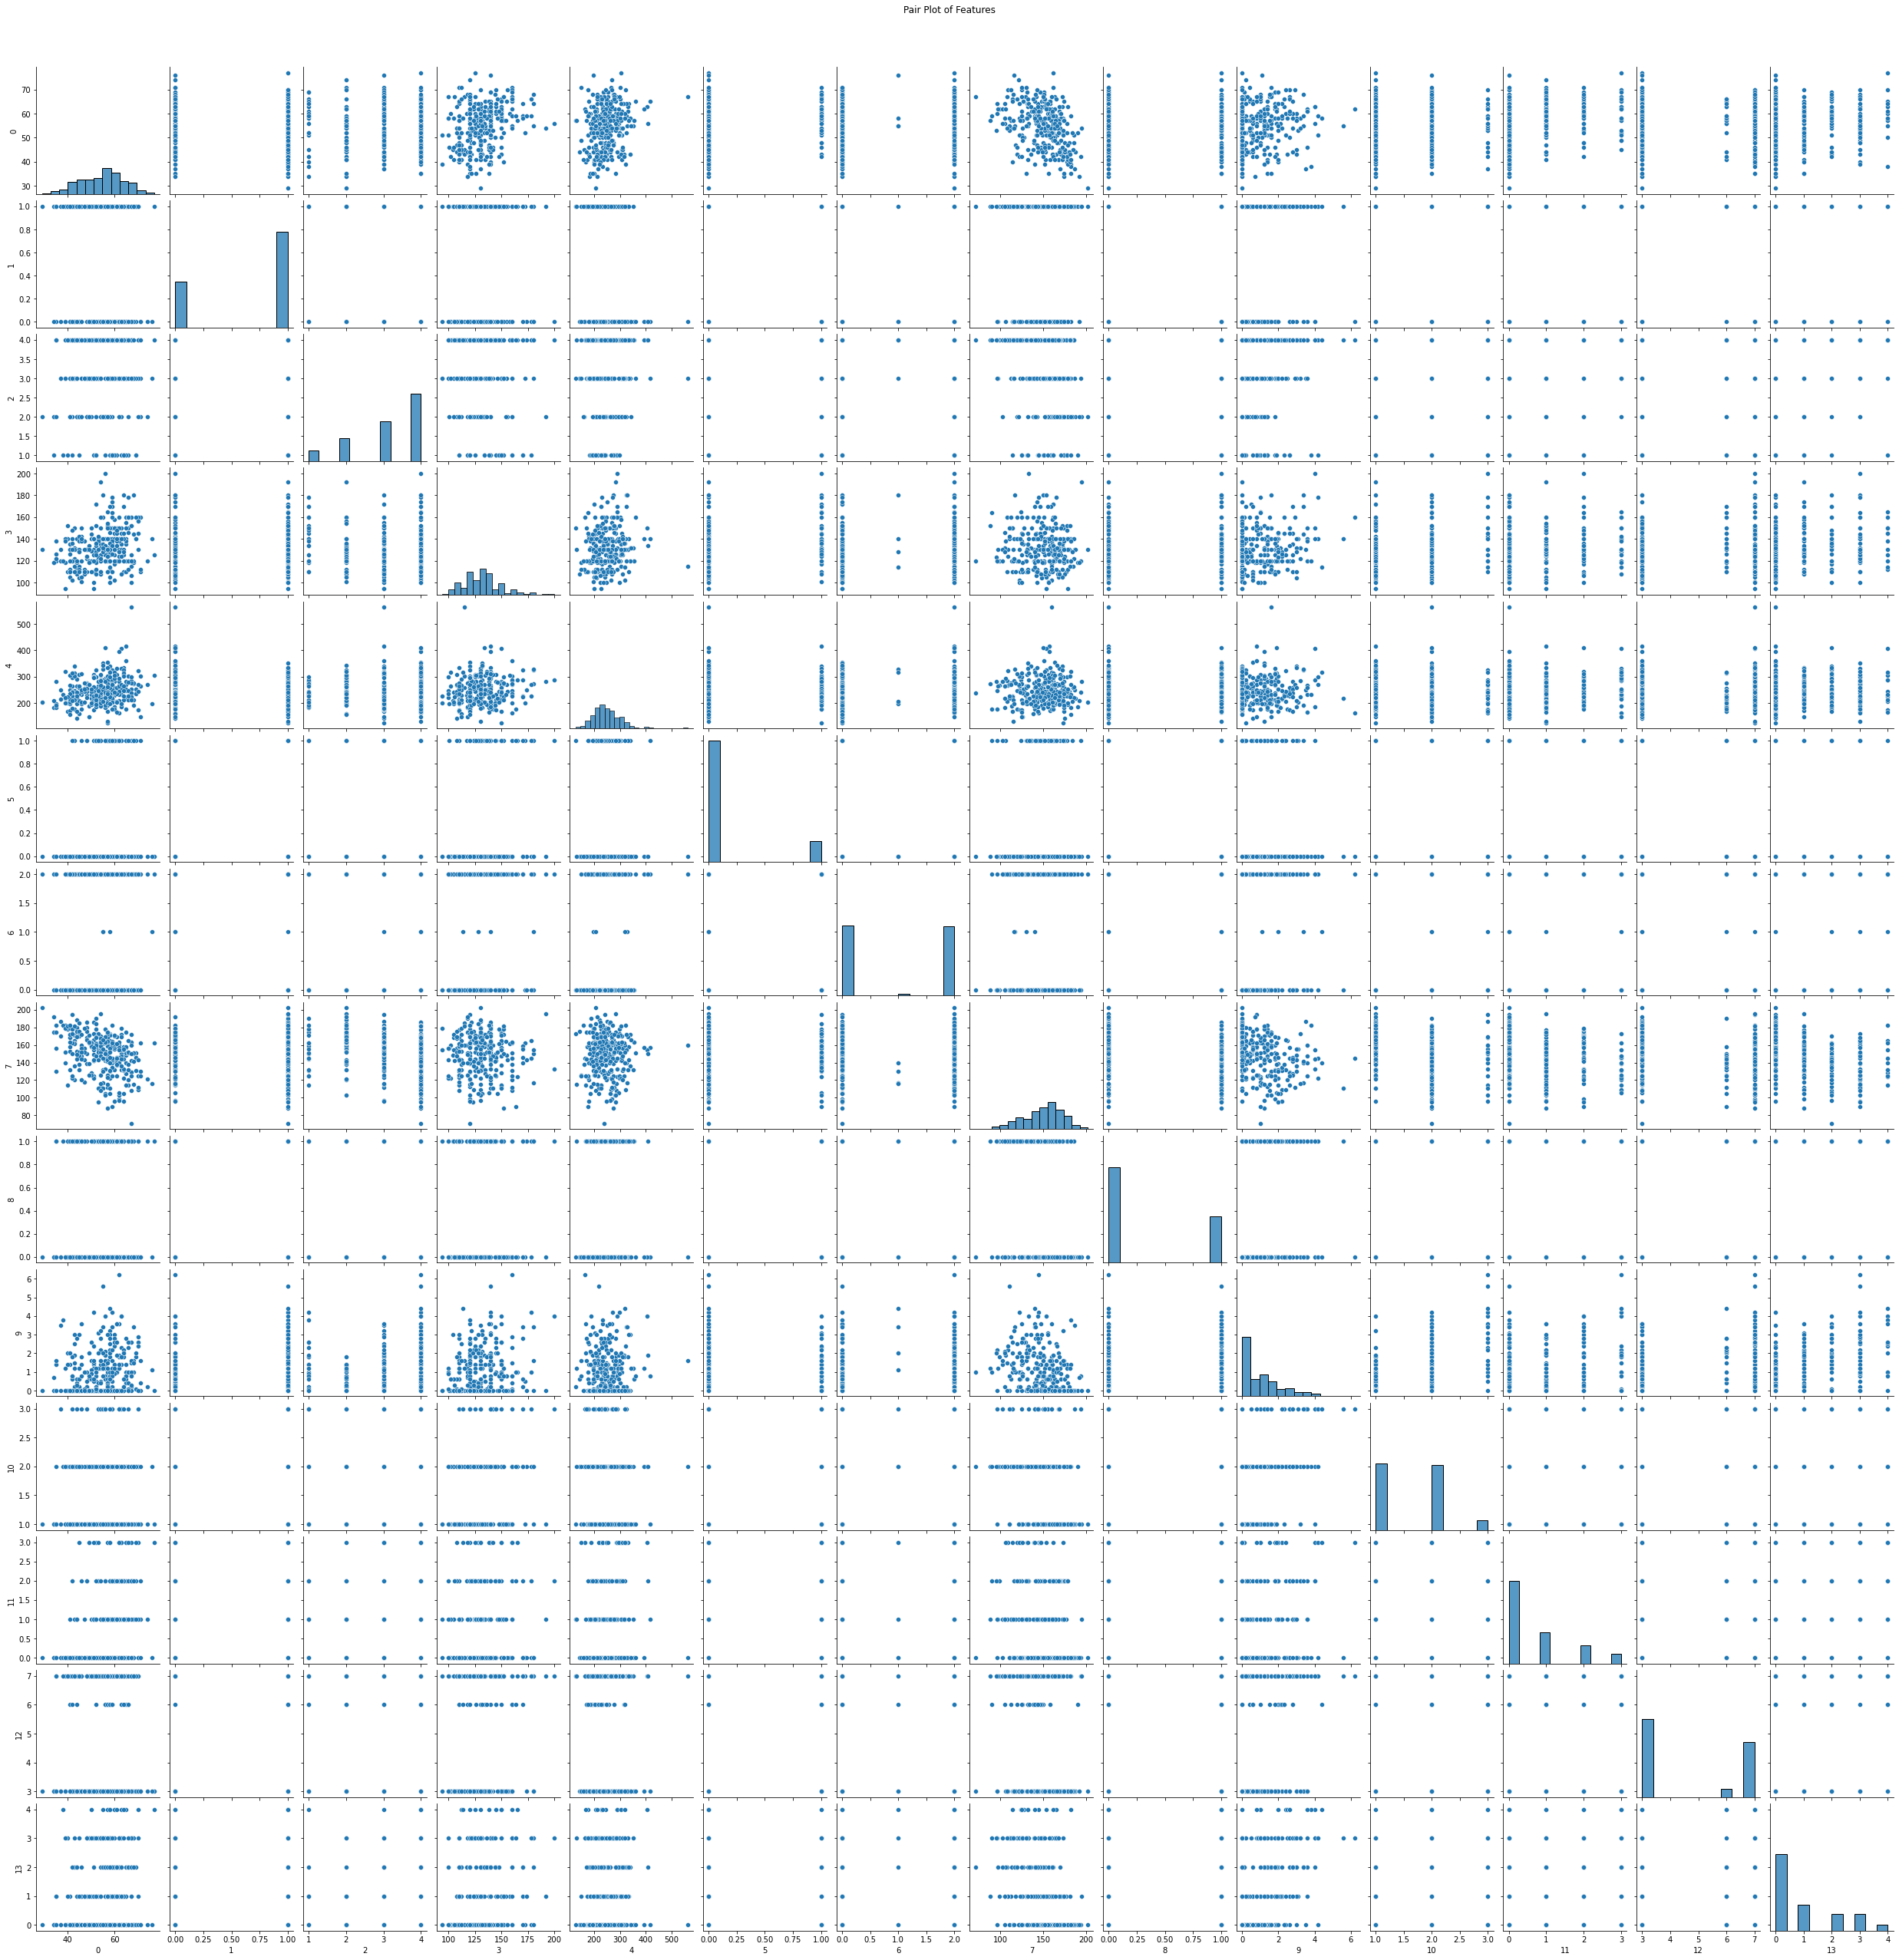

Accuracy of SVM model: 0.65

Random person with heart disease (Class 1):
Predicted class: [0]
Features: 0      59.0
1       1.0
2       2.0
3     140.0
4     221.0
5       0.0
6       0.0
7     164.0
8       1.0
9       0.0
10      1.0
11      0.0
12      3.0
Name: 140, dtype: float64

Random person without heart disease (Class 0):
Predicted class: [0]
Features: 0      52.0
1       1.0
2       2.0
3     134.0
4     201.0
5       0.0
6       0.0
7     158.0
8       0.0
9       0.8
10      1.0
11      1.0
12      3.0
Name: 98, dtype: float64


In [11]:
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Cleveland Heart Disease dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), header=None, na_values='?')

# Handling missing values
data.dropna(inplace=True)

# Explore data with visualizations
sns.countplot(x=data[13])
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(data)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# Splitting the dataset into features (X) and the target variable (y)
X = data.drop(columns=[13])  # Assuming the target column is the last one
y = data[13]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)

# Now, let's find a random person who has heart disease (class 1) and who doesn't have heart disease (class 0)
# Check if there are individuals from both classes in the test set
if (y_test == 1).any() and (y_test == 0).any():
    # Randomly select indices from the test set for each class
    random_index_with_disease = random.choice(y_test[y_test == 1].index)
    random_index_without_disease = random.choice(y_test[y_test == 0].index)

    # Ensure that randomly selected indices do not exceed the size of the test set
    random_index_with_disease = min(random_index_with_disease, len(X_test_scaled) - 1)
    random_index_without_disease = min(random_index_without_disease, len(X_test_scaled) - 1)

    # Predict the classes for the selected individuals
    person_with_disease = X_test_scaled[random_index_with_disease]
    person_without_disease = X_test_scaled[random_index_without_disease]

    prediction_with_disease = svm_model.predict([person_with_disease])
    prediction_without_disease = svm_model.predict([person_without_disease])

    print("\nRandom person with heart disease (Class 1):")
    print("Predicted class:", prediction_with_disease)
    print("Features:", X_test.iloc[random_index_with_disease])

    print("\nRandom person without heart disease (Class 0):")
    print("Predicted class:", prediction_without_disease)
    print("Features:", X_test.iloc[random_index_without_disease])
else:
    print("No individuals from both classes in the test set.")


In [16]:
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Cleveland Heart Disease dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), header=None, na_values='?')

#description
print(data.describe())

               0           1           2           3           4           5    
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  \
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

               6           7           8           9           10          11   
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  \
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750